In [2]:
import pandas as pd
df = pd.read_csv('Dataset#5_titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df = df.apply(encoder.fit_transform)

df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,2,601,1,28,1,0,18
1,1,0,822,0,51,1,0,207
2,1,2,171,0,34,0,0,41
3,1,0,813,0,47,1,0,189
4,0,2,732,1,47,0,0,43
...,...,...,...,...,...,...,...,...
882,0,1,882,1,35,0,0,85
883,1,0,187,0,24,0,0,153
884,0,2,99,0,11,1,2,131
885,1,0,524,1,34,0,0,153


In [4]:
from sklearn.model_selection import train_test_split
df = df.drop(['Name'],axis = 1)
x_train,x_test,y_train,y_test = train_test_split(df.drop(['Survived'],axis =1),df['Survived'],test_size= 0.3)

In [5]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [6]:
import numpy as np
prediction = model.predict(x_test)
print("prediction: ",prediction[0:5])
print("actual values: ",np.array(y_test)[0:5])
print(y_test.shape)

prediction:  [0 0 1 0 1]
actual values:  [0 0 1 0 0]
(267,)


In [7]:
from sklearn.metrics import confusion_matrix,accuracy_score

labels = [0,1]
cm = confusion_matrix(y_test,prediction,labels=labels)
print(cm)
print("Accuracy = ",accuracy_score(y_test,prediction)*100)
import seaborn as sns

[[140  31]
 [ 26  70]]
Accuracy =  78.65168539325843


<AxesSubplot:>

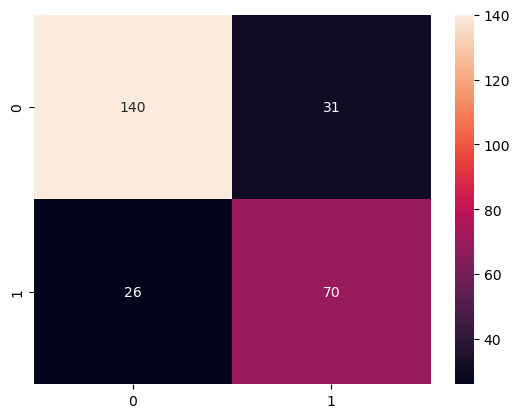

In [11]:
sns.heatmap(cm,annot=True,fmt='0.3g')